In [12]:
# Import Packages and setup
from __future__ import print_function, division
import os

import numpy as np
from astropy.table import Table
from astropy.io import fits

import lsst.afw.table as afwTable
from lsst.utils import getPackageDir
from lsst.meas.deblender import proximal, sim

dataPath = os.path.abspath(os.path.join(getPackageDir("testdata_deblender"), 'sim_data'))
catFilename = os.path.join(dataPath, "test1/det_merge.fits")
simFilename = os.path.join(dataPath, "test1/catalog_true.fits")
filters = ["u", "g", "r", "i", "z", 'y']

In [48]:
for i in range(1,6):
    simFilename = os.path.join(dataPath, "test{0}/catalog_true.fits".format(i))
    _, tbl = sim.loadSimCatalog(simFilename)
    tbl.write(simFilename.replace("catalog_true", "table_true"))

In [4]:
tbl = Table.read(os.path.join(dataPath, "test1/table_true.fits"))

In [21]:
intensity = {}
width = int(np.sqrt(tbl["intensity_g"][0].size))
for f in filters:
    intensity[f] = np.sum(np.array(tbl["intensity_"+f]), axis=0).reshape(width,width)

In [38]:
imgFilename = os.path.join(dataPath, "test1/{0}_{1}.fits")
calexps,_,_  = proximal.loadCalExps(filters, imgFilename)

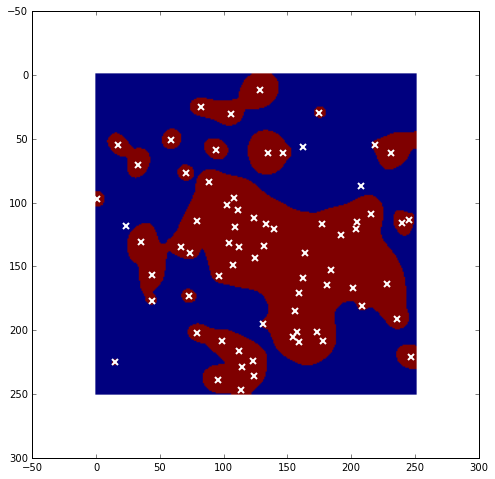

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

sigma = 1.6

mask = np.zeros_like(intensity["u"], dtype=bool)
for f in filters:
    mask = mask | (intensity[f]>sigma)

plt.figure(figsize=(8,8))
plt.imshow(mask)
for src in tbl:
    plt.plot(src["x"], src["y"], "wx", mew=2)
plt.show()

In [28]:
tbl

redshift,flux_y,star,flux_i,intensity_g [63001],intensity_u [63001],flux_z,intensity_r [63001],intensity_z [63001],sed [260],intensity_y [63001],y,flux_g,wave [260],flux_r,x,flux_u,intensity_i [63001],size
float64,float64,int32,float64,float32,float32,float64,float32,float32,float32,float32,float64,float64,float32,float64,float64,float64,float32,float64
0.0496118872133,1679.42482799,0,3214.40831465,0.00015577 .. 0.000120225,1.66551e-05 .. 1.28546e-05,2697.42554606,0.000210628 .. 0.000162565,0.000178335 .. 0.000137641,7.9147 .. 44.4595,0.000111032 .. 8.56957e-05,134.511463048,2356.11040515,200.0 .. 1495.0,3185.88454363,111.688324996,251.919195401,0.000212514 .. 0.000164021,14.2858772243
0.736537111351,46.4013835634,0,76.4326342033,0.000338996 .. 3.09268e-05,8.80935e-05 .. 8.03681e-06,75.6868584021,0.000569905 .. 5.19928e-05,0.000917847 .. 8.37357e-05,7.5713 .. 31.3507,0.000562705 .. 5.13359e-05,112.305849703,27.9540382411,200.0 .. 1495.0,46.9951368342,-29.1729093081,7.26429977572,0.000926891 .. 8.45607e-05,14.6362701854
0.0979563107277,297.921422116,0,574.610732441,0.000816748 .. 0.000102095,9.42363e-05 .. 1.17797e-05,486.033941667,0.00103885 .. 0.000129858,0.000859239 .. 0.000107407,2.76097 .. 10.3825,0.000526683 .. 6.58365e-05,116.452860815,461.998731659,200.0 .. 1495.0,587.629911292,177.379041342,53.3053600764,0.00101583 .. 0.000126981,25.0799151491
0.0,532.292978507,1,1631.93455,-8.6281e-06 .. 1.48947e-06,-1.16314e-06 .. 2.00792e-07,1040.30051267,-6.33322e-06 .. 1.0933e-06,-2.69689e-06 .. 4.65563e-07,0.195784 .. 0.133697,-1.37992e-06 .. 2.38216e-07,60.6299536683,3328.20968054,200.0 .. 1495.0,2442.98215879,146.739252207,448.669423701,-4.23065e-06 .. 7.30336e-07,0.0
0.670715760744,1073.62347264,0,2109.56678844,0.00901928 .. 0.000123873,0.00233998 .. 3.21378e-05,1833.09300856,0.0153656 .. 0.000211034,0.0181611 .. 0.000249429,13.766 .. 47.0368,0.0106368 .. 0.000146088,50.9345992785,910.36252751,200.0 .. 1495.0,1550.92583342,58.8131073941,236.186428347,0.0209002 .. 0.000287048,31.3839298896
0.374130061585,201.201456788,0,404.96757367,0.000309817 .. 0.000113179,5.54663e-05 .. 2.02623e-05,336.004676549,0.000569298 .. 0.000207969,0.000466165 .. 0.000170294,3.1175 .. 8.17994,0.000279142 .. 0.000101973,56.1592845803,223.311793247,200.0 .. 1495.0,410.34145841,162.092465826,39.9793142337,0.000561842 .. 0.000205246,32.6197116221
0.568585344116,1010.0505543,0,1874.47021527,0.000129144 .. 0.000154431,2.62884e-05 .. 3.14358e-05,1629.56686881,0.000273566 .. 0.000327132,0.000334404 .. 0.000399882,9.68471 .. 38.7411,0.000207273 .. 0.000247858,120.356177962,629.323938679,200.0 .. 1495.0,1333.10132611,139.588756812,128.104554254,0.000384661 .. 0.000459979,13.8582411196
0.833041894539,911.417333305,0,1401.93584516,0.000129213 .. 9.82405e-07,3.60531e-05 .. 2.74111e-07,1514.35833434,0.000178507 .. 1.35719e-06,0.000300811 .. 2.28706e-06,11.3053 .. 36.2071,0.000181043 .. 1.37647e-06,58.3180972639,650.491759623,200.0 .. 1495.0,898.65071984,93.6809844124,181.500443277,0.000278479 .. 2.11727e-06,10.3441342343
0.626229562194,216.16554406,0,433.148280331,4.88701e-05 .. 6.96608e-06,1.30857e-05 .. 1.86527e-06,358.124315758,7.92457e-05 .. 1.12959e-05,8.69728e-05 .. 1.23973e-05,3.14873 .. 7.97753,5.24972e-05 .. 7.48309e-06,83.8383109867,201.230577894,200.0 .. 1495.0,326.306671441,88.2478088066,53.8825304143,0.000105193 .. 1.49945e-05,8.83664374972
